# **Pré-processamento e exploração de dados**
Aqui vou explorar as características da série temporal
- Plotar gráficos
- Analisar
  - distribuição
  - sazonalidade
  - tendência
  - auto-correlação
- Teste de estacionariedade

## **Prepare o ambiente**

<br/>

### Imports

In [63]:
# Análise de dados
import numpy as np
import pandas as pd

# Métricas
import statistics

# Plotting
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot

import matplotlib.pyplot as plt
from matplotlib import pyplot

# statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa as tsa
import statsmodels.api as sm

# Outros
from IPython.display import Image
import warnings
import pprint
import openpyxl
import datetime
import os

<br/>

### Definir configuração

In [64]:
%matplotlib inline

# Carrega a extensão "autoreload" para que o código possa mudar
%load_ext autoreload

# ----------
# Plot
# ----------
# graph style
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

# ----------
# Seaborn rcParams
# ----------
rc={'savefig.dpi': 500,
    'figure.autolayout': True,
    'figure.figsize': [17, 12],
    'axes.labelsize': 18,
    'axes.titlesize': 18,
    'font.size': 10,
    'lines.linewidth': 1.0,
    'lines.markersize': 8,
    'legend.fontsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15}

sns.set_context("paper")  # Definindo o contexto para "paper"
sns.set_theme(style='darkgrid',
    palette='deep',
    color_codes=True,
    rc=rc)

# ----------
# Pandas
# ----------
# Floating point
pd.options.display.float_format = '{:.2f}'.format

# Print xxxx rows and all columns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

# ----------
# Python
# ----------
# pretty print
pp = pprint.PrettyPrinter(indent=4)

# Suprima avisos desnecessários para que a apresentação pareça limpa
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
# plt.style.use('seaborn')  # fivethirtyeight - Removido
plt.rc('figure',figsize=(16,8))
plt.rc('font',size=15)
plt.rc('legend',fontsize=15)

# Seaborn rcParams
# ===================
sns.set_theme(context='poster',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True)

# graph style
sns.set_theme(style='dark', palette='deep')

plt.style.use('fivethirtyeight')

---

## **Compreensão dos dados**
### Colete dados iniciais

<br/>

### Load Data

In [ ]:
# Para carregamento do Drive no colab
from google.colab import drive
drive.mount('/content/drive')

In [101]:
%%time

df = pd.read_excel(r'C:\Users\Lucas S\OneDrive\Documents\ADM_UFPB\TCC1\db_soja_modificado\db_soja_ESALQ_BM_FBOVESPA_PARANAGUÁ_diário.xlsx',)

CPU times: total: 453 ms
Wall time: 456 ms


In [102]:
df.head()

,data,à_vista_real,à_vista_dolar
0,2006-03-13,27.66,12.96
1,2006-03-14,27.45,12.91
2,2006-03-15,27.58,13.00
3,2006-03-16,26.97,12.78
4,2006-03-17,26.96,12.68


<br/>

### **Describe Data**

In [103]:
# Este comando fornece um resumo conciso do DataFrame, incluindo o número de entradas não nulas em cada coluna e o tipo de dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4437 entries, 0 to 4436
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   data           4437 non-null   datetime64[ns]
 1   à_vista_real   4437 non-null   float64       
 2   à_vista_dolar  4437 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 104.1 KB


In [96]:
print("Dataframe:\n{} rows\n{} columns".format(df.shape[0],
                                               df.shape[1]))

Dataframe:
4437 rows
3 columns


In [70]:
list_columns = (df.columns).tolist()

print("-"*25, "List Columns", "-"*25, end='\n')
display(list_columns)

------------------------- List Columns -------------------------


['data', 'à_vista_real', 'à_vista_dolar']

<br/>

### **Explore Data**

In [71]:
# Este comando gera estatísticas descritivas, incluindo a tendência central, a dispersão e a forma da distribuição de um conjunto de dados.
df.describe()

,data,à_vista_real,à_vista_dolar
count,4437,4437.00,4437.00
mean,2015-02-05 07:47:01.095334656,82.93,26.06
min,2006-03-13 00:00:00,26.57,12.40
25%,2010-08-26 00:00:00,48.91,21.50
50%,2015-02-03 00:00:00,71.93,25.16
75%,2019-07-19 00:00:00,88.71,30.61
max,2023-12-28 00:00:00,207.14,45.32
std,NaN,45.45,6.15


In [72]:
# Este comando retorna o número de elementos únicos em cada coluna.
df.nunique()

data             4437
à_vista_real     3074
à_vista_dolar    1862
dtype: int64

In [73]:
# Este comando retorna a moda de cada coluna de dados.
df.mode(dropna=False, numeric_only=True)

,à_vista_real,à_vista_dolar
0,61.17,20.98


In [74]:
# Este comando retorna a mediana de cada coluna de dados.
df.median()

data             2015-02-03 00:00:00
à_vista_real                   71.93
à_vista_dolar                  25.16
dtype: object

In [75]:
# Este comando verifica se há algum valor nulo no DataFrame.
df.isnull().any()

data             False
à_vista_real     False
à_vista_dolar    False
dtype: bool

In [76]:
# Este comando verifica se há alguma linha duplicada no DataFrame.
df.duplicated().any()

False

---

## **Preparação de dados: limpeza**
A análise da ST é univariada, ou seja, somente a coluna `priço` em relação ao tempo que será prevista. Isto vai garantir uma melhor comparação entre os modelos estatísticos, de aprendizado de máquina e aprendizado profundo.

#### Todas as colunas em letras minúsculas

In [ ]:
df.columns =  map(str.lower, df.columns)
print(df.columns)

#### lista de colunas

In [20]:
list_columns = []
list_columns = df.columns

list_columns

Index(['data', 'à_vista_real', 'à_vista_dolar'], dtype='object')

### Formatação das Colunas

#### Data


In [105]:
# Se necessário
df['data'] = pd.to_datetime(df['data'])
df = df.set_index('data').asfreq('D')

In [106]:
df = df.interpolate(method='time').round(2)

In [111]:
df.head()

,à_vista_real,à_vista_dolar
data,,
2006-03-13,27.66,12.96
2006-03-14,27.45,12.91
2006-03-15,27.58,13.00
2006-03-16,26.97,12.78
2006-03-17,26.96,12.68


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6500 entries, 2006-03-13 to 2023-12-28
Freq: D
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   à_vista_real   6500 non-null   float64
 1   à_vista_dolar  6500 non-null   float64
dtypes: float64(2)
memory usage: 152.3 KB


In [114]:
df['data'] = df.index

In [ ]:
df.tail(20)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6500 entries, 2006-03-13 to 2023-12-28
Freq: D
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   à_vista_real   6500 non-null   float64       
 1   à_vista_dolar  6500 non-null   float64       
 2   data           6500 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 203.1 KB


<br/>

### **Verify Data Quality**
- Check index
- Check for irrelevant values
- Check for outliers

<br/>

#### Check Index

In [117]:
df.index

DatetimeIndex(['2006-03-13', '2006-03-14', '2006-03-15', '2006-03-16',
               '2006-03-17', '2006-03-18', '2006-03-19', '2006-03-20',
               '2006-03-21', '2006-03-22',
               ...
               '2023-12-19', '2023-12-20', '2023-12-21', '2023-12-22',
               '2023-12-23', '2023-12-24', '2023-12-25', '2023-12-26',
               '2023-12-27', '2023-12-28'],
              dtype='datetime64[ns]', name='data', length=6500, freq='D')

In [127]:
df_date_index = df
df_date_index

,à_vista_real,à_vista_dolar,data
data,,,
2006-03-13,27.66,12.96,2006-03-13
2006-03-14,27.45,12.91,2006-03-14
2006-03-15,27.58,13.00,2006-03-15
2006-03-16,26.97,12.78,2006-03-16
2006-03-17,26.96,12.68,2006-03-17
...,...,...,...
2023-12-24,145.17,29.97,2023-12-24
2023-12-25,144.44,29.88,2023-12-25
2023-12-26,143.71,29.78,2023-12-26


<br/>

#### Verifique se há valores irrelevantes

In [ ]:
df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)

<br/>

#### Check for outliers

In [124]:
def plot_box_plot(df: 'dataframe', data_set_name: str, xlim=None):
    fig, ax = plt.subplots(figsize=(20, 10))  # Aumente o primeiro valor para tornar o gráfico mais largo

    if xlim is not None:
        plt.xlim(*xlim)

    plt.title(f"Boxplot Horizontal de Preço")

    plt.ylabel('Variáveis ​​dependentes')
    plt.xlabel('Medição x')
    ax = sns.boxplot(data = df,
                    orient = 'h',
                    palette = 'Set2',
                    notch = False)  # box instead of notch shape

    plt.show()

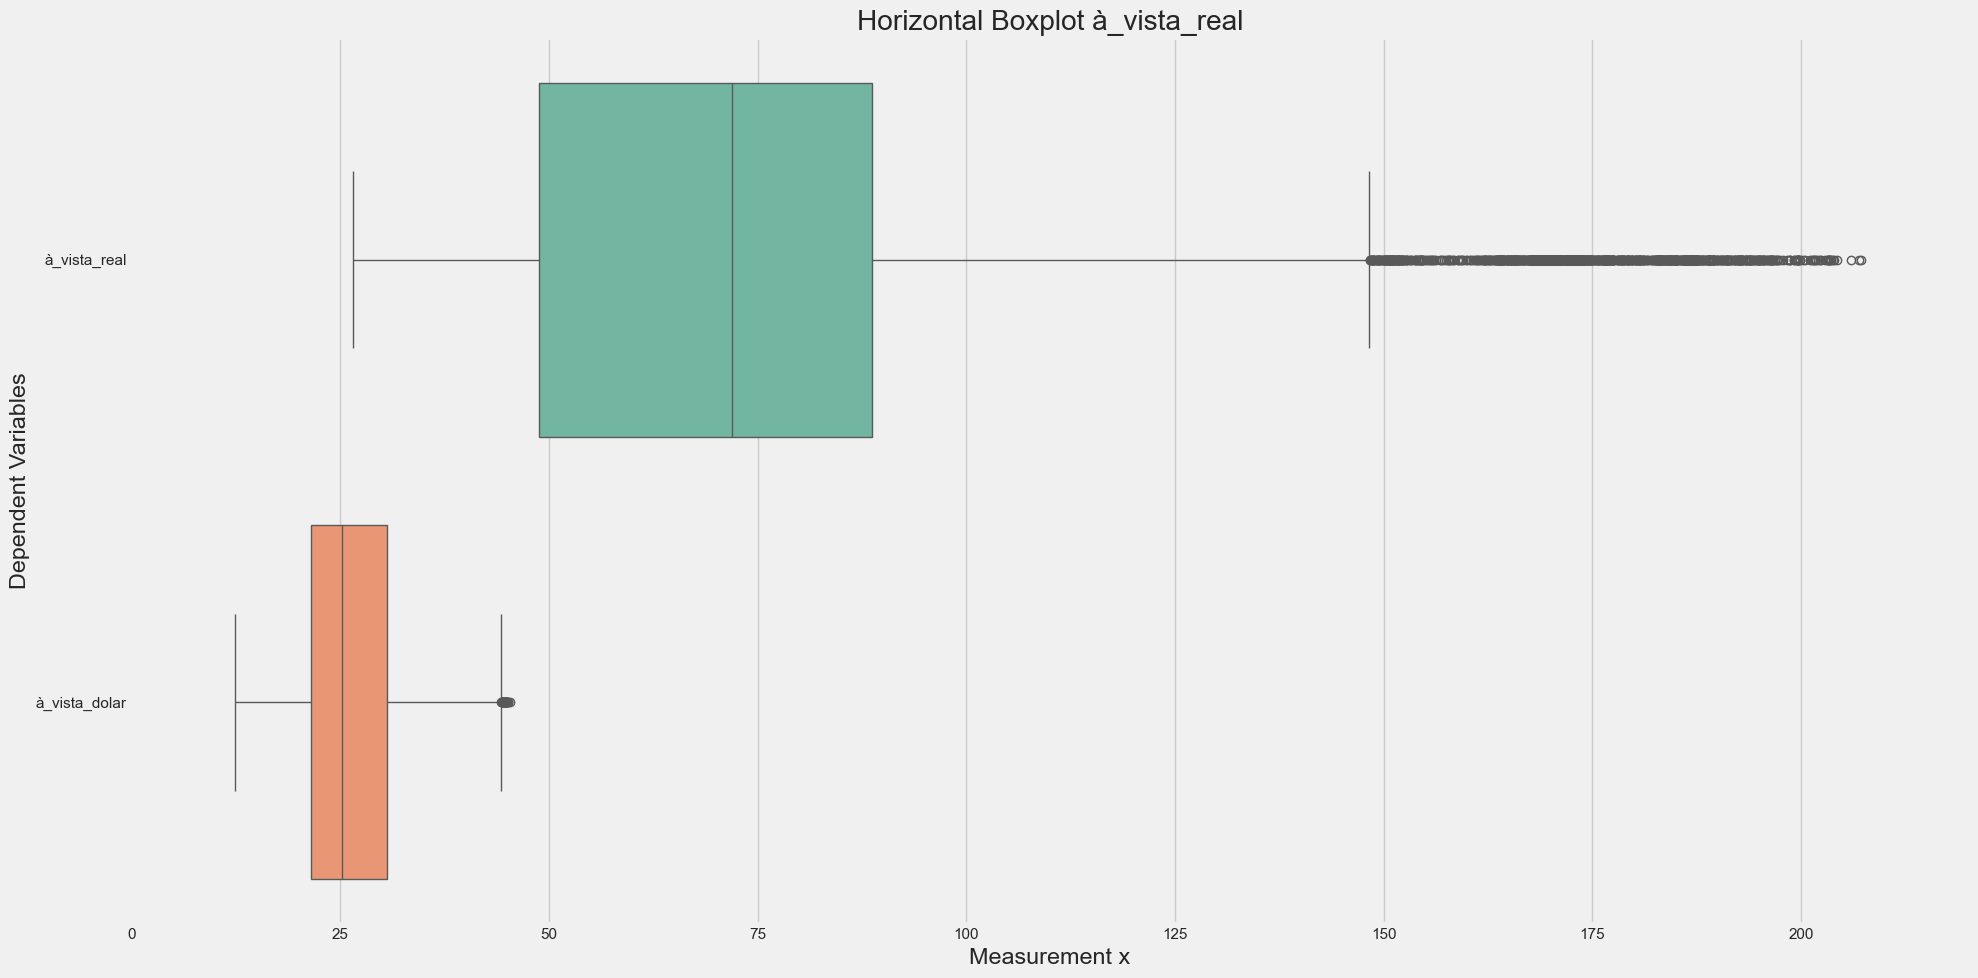

In [128]:
plot_box_plot(df_date_index,
              'à_vista_real',
              (0, 220))

---

## **Compreensão de dados: estatísticas e gráficos**
### **Exploração de dados**
- Análise dos componentes da ST
- distribuição
- sazonalidade
- tendência
- ruídos

In [129]:
def save_image(img: 'matplotlib',
               name: str,
               path: str = 'reports/images/'):

    fig = img.get_figure()
    fig.savefig(f"reports/images/{name}.png")

    return f"Image {name} saved."

#### Distribuição

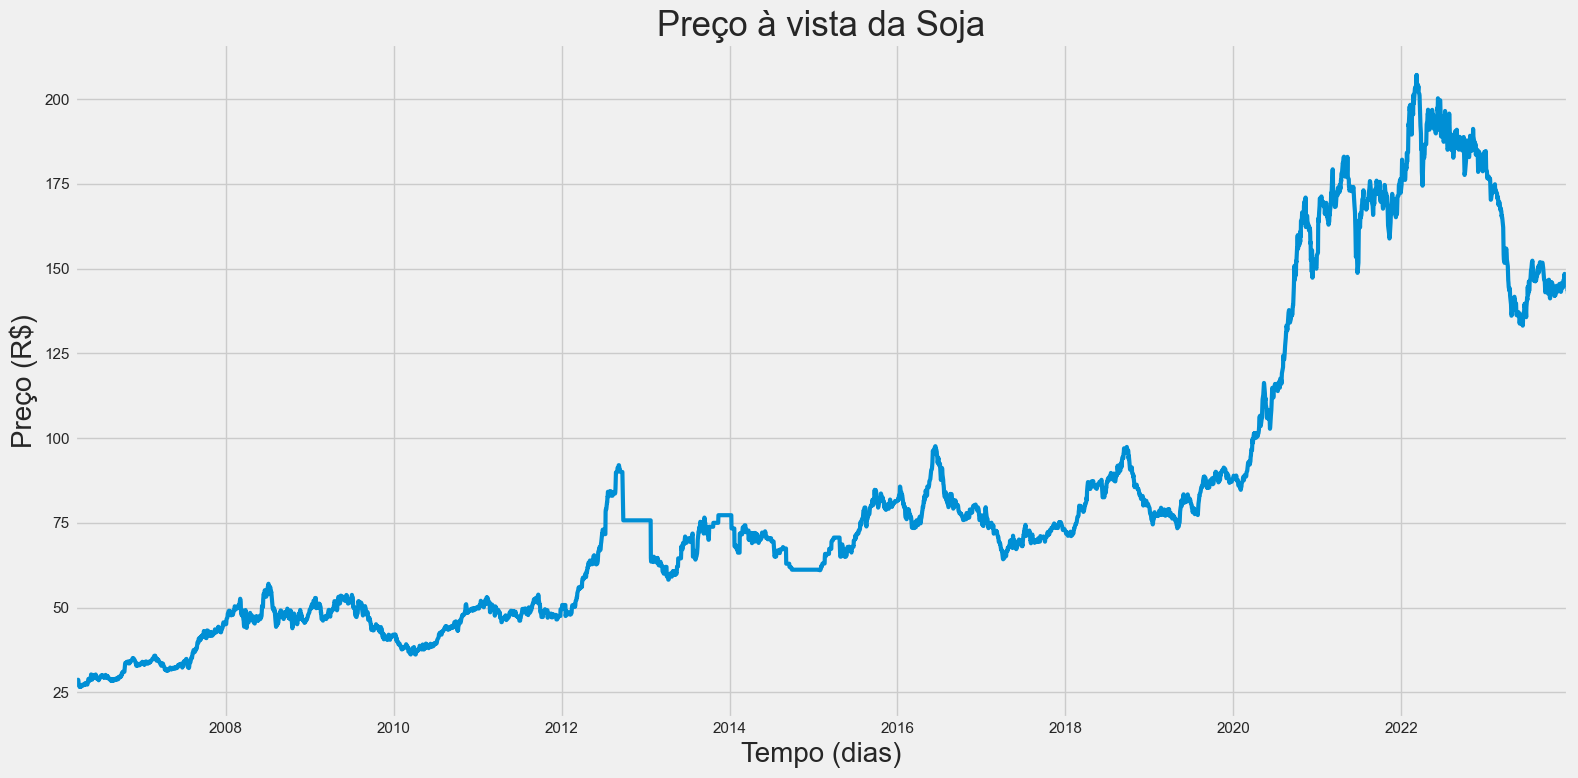

In [134]:
img_vale3_distr_line = df_date_index['à_vista_real'].plot(linewidth=3)

plt.title(f'Preço à vista da Soja', fontsize=25)
plt.xlabel("Tempo (dias)", fontsize=20)
plt.ylabel("Preço (R$)", fontsize=20)
plt.grid(True)

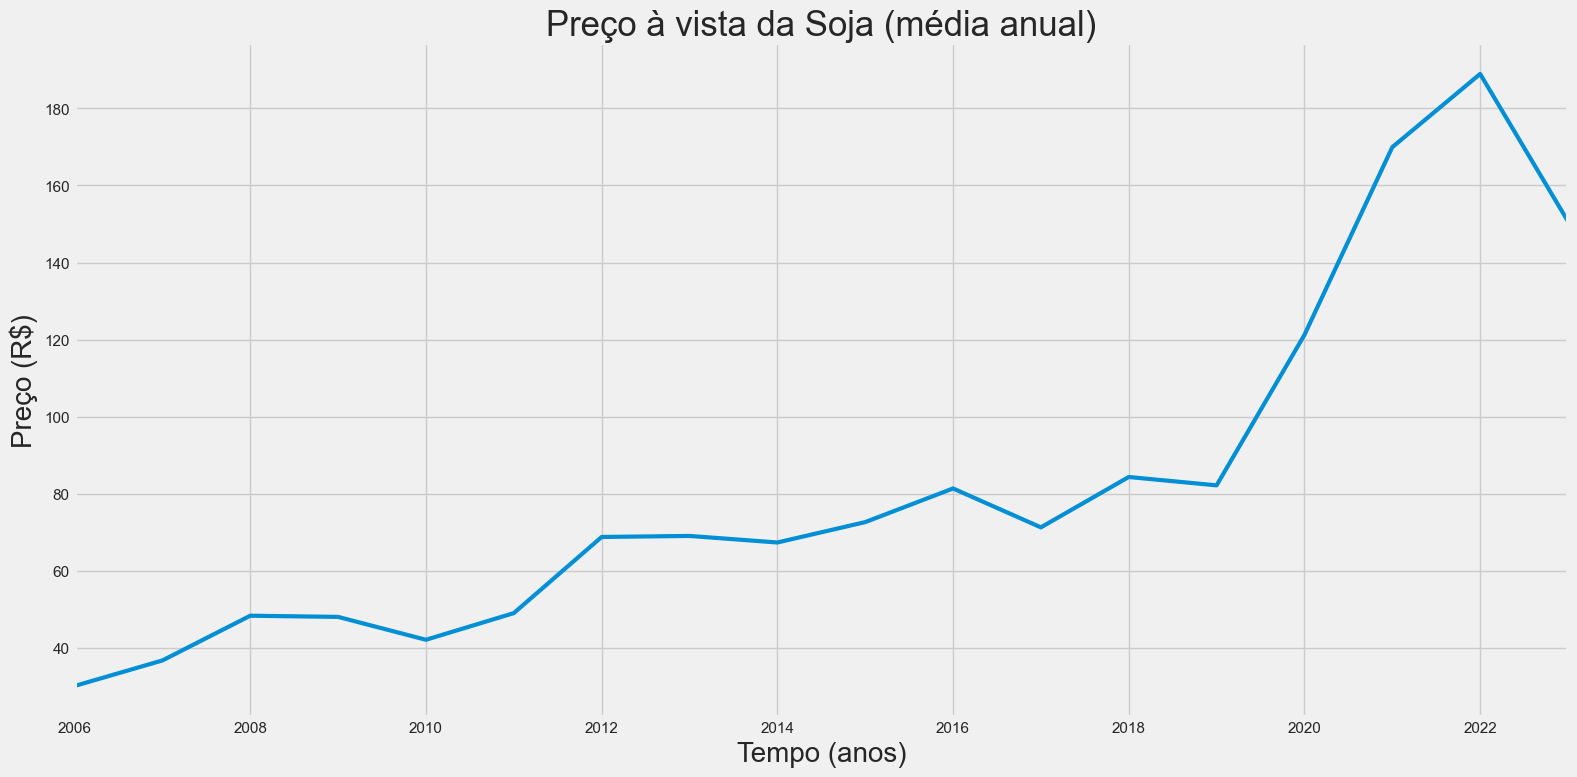

In [135]:
df_date_index['à_vista_real'].resample('A').mean().plot(linewidth=3)

plt.title(f'Preço à vista da Soja (média anual)', fontsize=25)
plt.xlabel("Tempo (anos)", fontsize=20)
plt.ylabel("Preço (R$)", fontsize=20)
plt.grid(True)
plt.show()

<br/>

### **Decomposição da Série Temporal**
- O objetivo é decompor a ST
- A ST aparenta ter duas tendências sendo os dois casos uma tendência linear do que exponencial, então a decomposição será `additive`

In [151]:
decomposition_add = seasonal_decompose(df['à_vista_real'],
                                       period=90,
                                       model='additive')
trend = decomposition_add.trend
seasonal = decomposition_add.seasonal
residual = decomposition_add.resid

<Axes: xlabel='data', ylabel='Resíduo'>

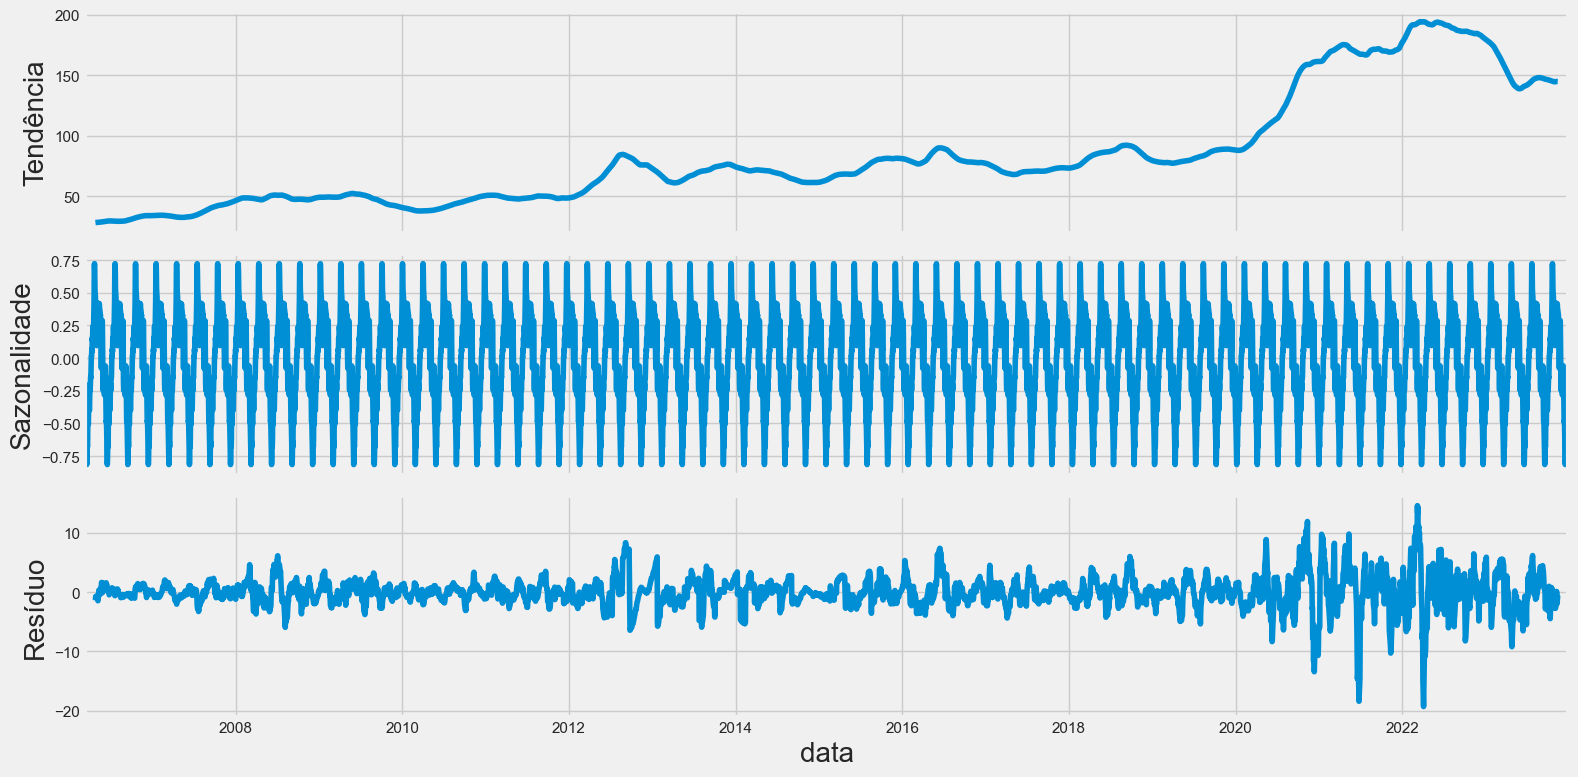

In [152]:
fig, axes = plt.subplots(ncols=1, nrows=3, sharex=True)

axes[0].set_ylabel('Tendência', fontsize=20)
axes[1].set_ylabel('Sazonalidade', fontsize=20)
axes[2].set_ylabel('Resíduo', fontsize=20)
axes[2].set_xlabel('Tempo dias', fontsize=20)

decomposition_add.trend.plot(ax=axes[0])
decomposition_add.seasonal.plot(ax=axes[1])
decomposition_add.resid.plot(ax=axes[2])

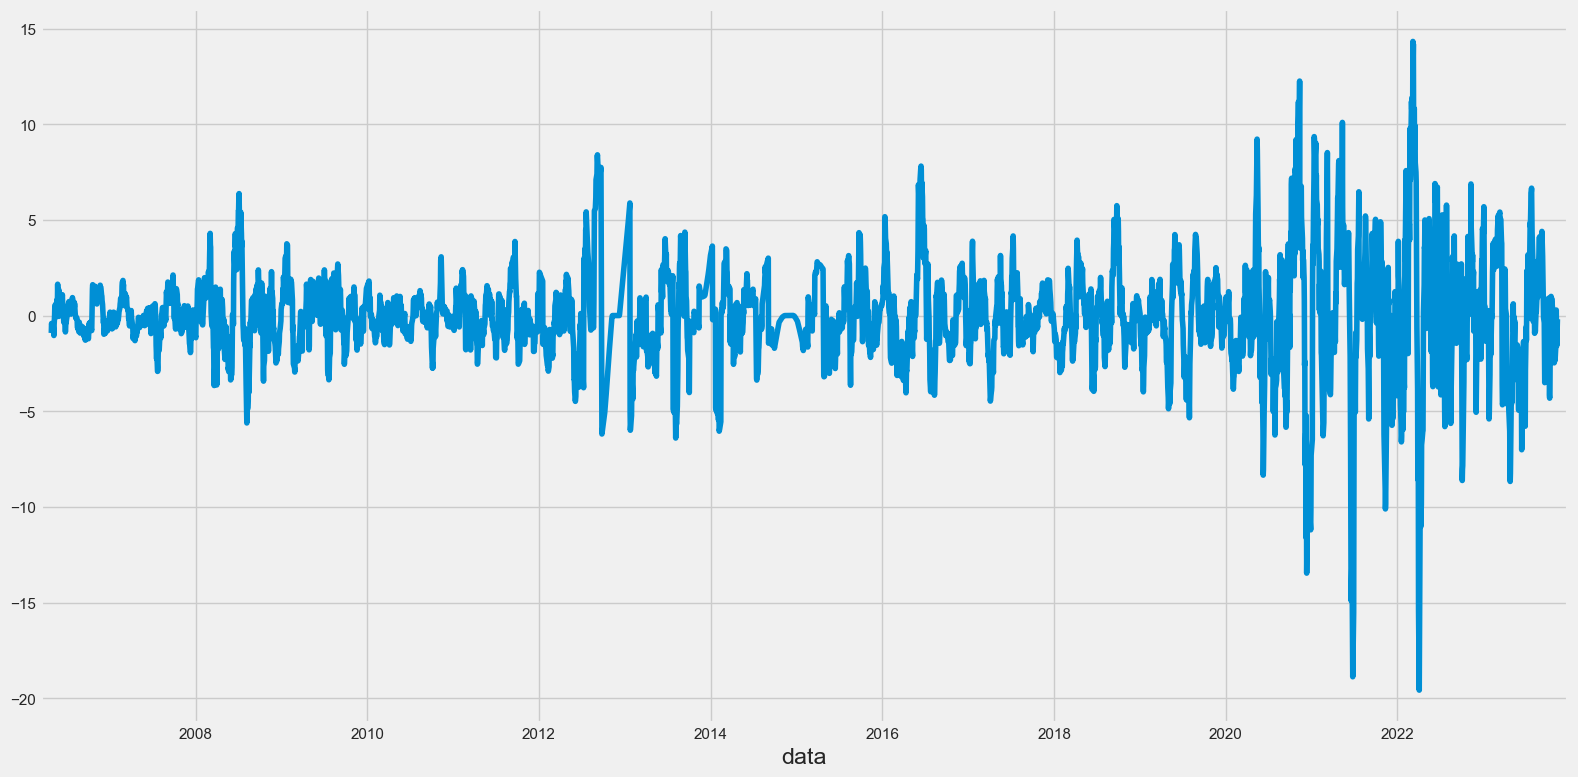

In [153]:
df_without_trend = df['à_vista_real'] - trend
img_df_without_trend = df_without_trend.plot()
#save_image(img=img_df_without_trend, name='img_df_without_trend')

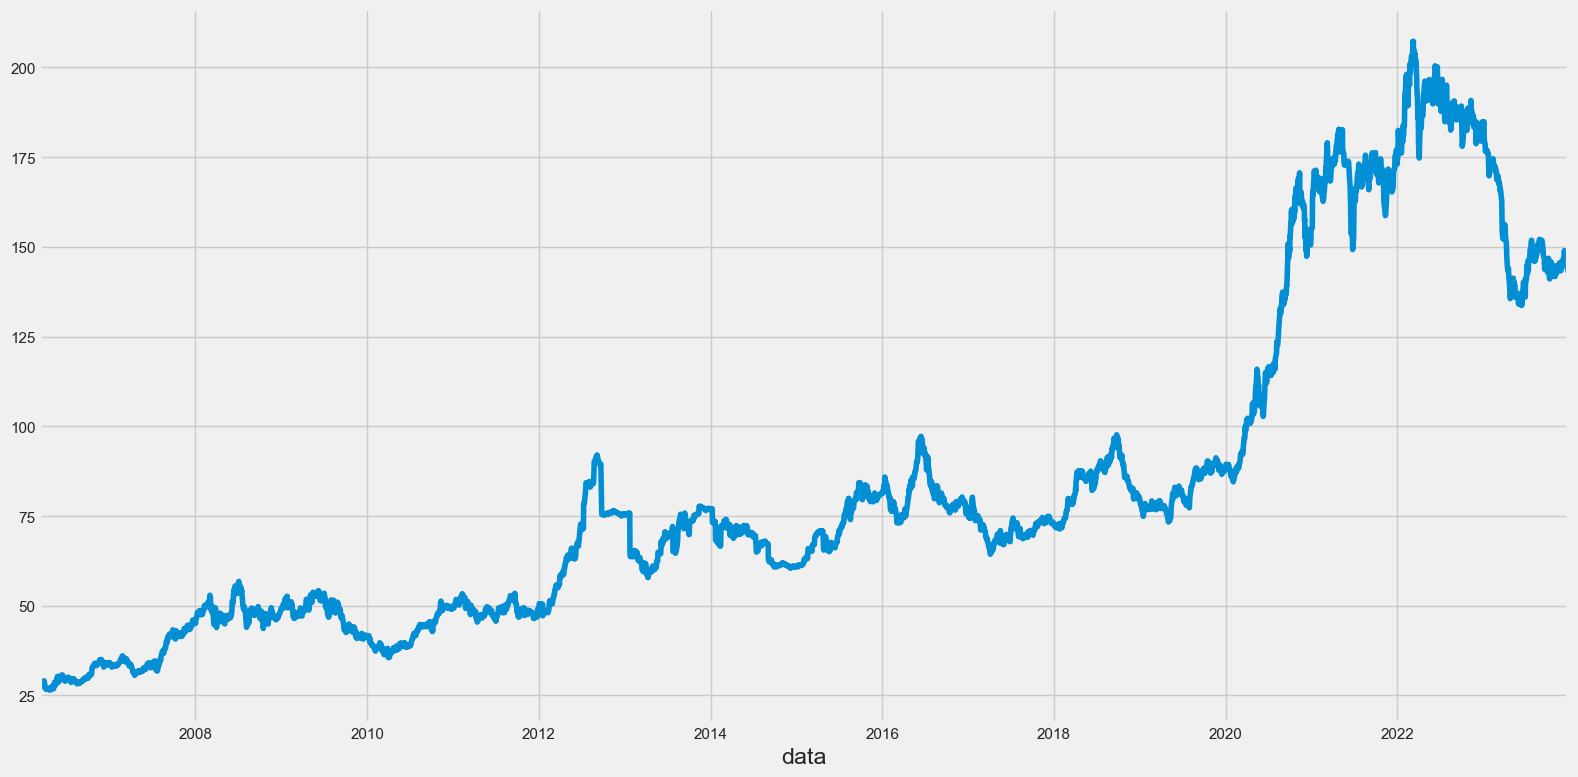

In [154]:
df_without_seasonal = df['à_vista_real'] - seasonal
img_df_without_seasonal = df_without_seasonal.plot()
#save_image(img=img_df_vale3_without_seasonal, name='img_df_vale3_without_seasonal')

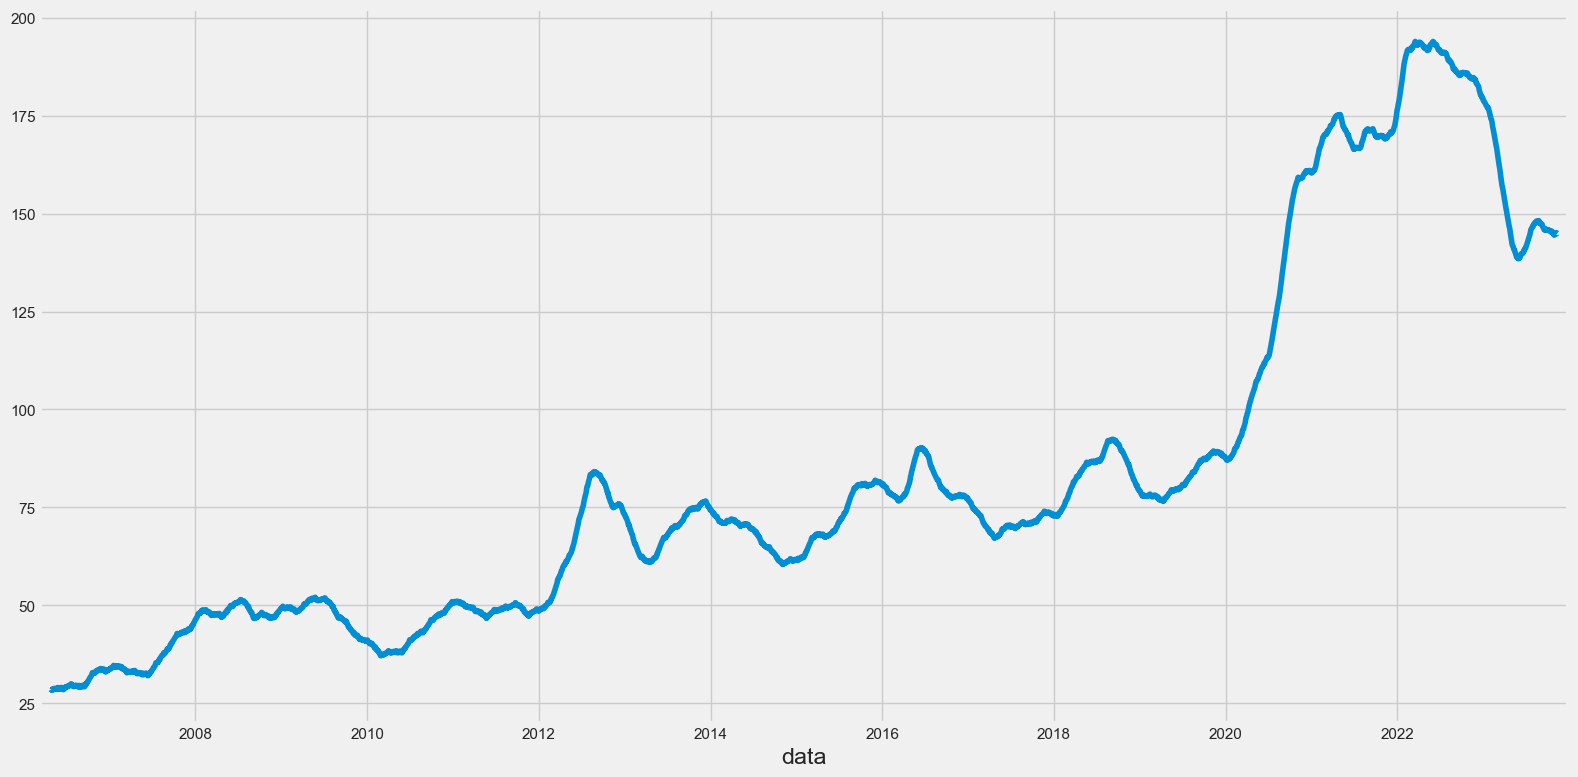

In [155]:
df_without_resid = df['à_vista_real'] - residual
df_without_resid = df_without_resid.plot()
#save_image(img=df_vale3_without_resid, name='df_vale3_without_resid')

---

<br/>

### **Auto-correlation**
Modelos autoregressivos como ARIMA, supõem que as observações anteriores são úteis para prever o valor da próxima etapa de tempo.
<br/>
Quanto mais forte a correlação entre a variável de saída e uma variável defasada específica, mais peso o modelo de auto-regressão pode colocar nessa variável.

#### NOTES:
- A correlação é calculada entre a variável e ela mesma nas etapas de tempo anteriores, por isso o nome autocorrelação.
- Calcular a correlação também podem ajudar escolher as variáveis de atraso serão úteis em um modelo e quais não serão.
- Se as variáveis de atraso mostrarem baixa ou nenhuma correlação com a variável de saída, a série temporal pode não ser previsível.
- Usei Pearson

#### wiki

 análise de autocorrelação é uma ferramenta matemática para encontrar padrões repetitivos, como a presença de um sinal periódico obscurecido por ruído ou a identificação da frequência fundamental ausente em um sinal implícito por suas frequências harmônicas . É frequentemente usado no processamento de sinais para analisar funções ou séries de valores, como sinais no domínio do tempo .

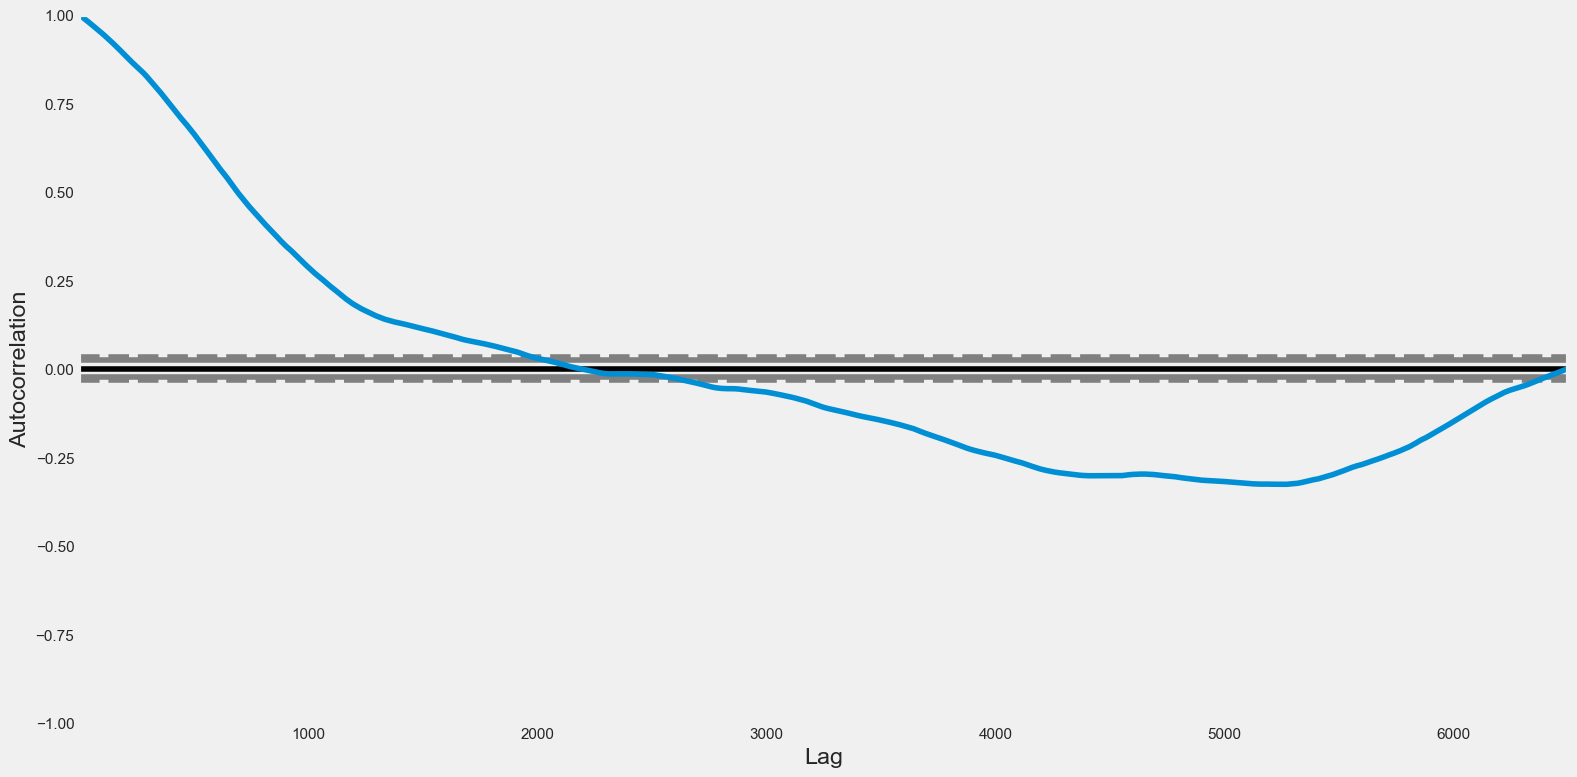

In [144]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_date_index['à_vista_real'])
plt.show()

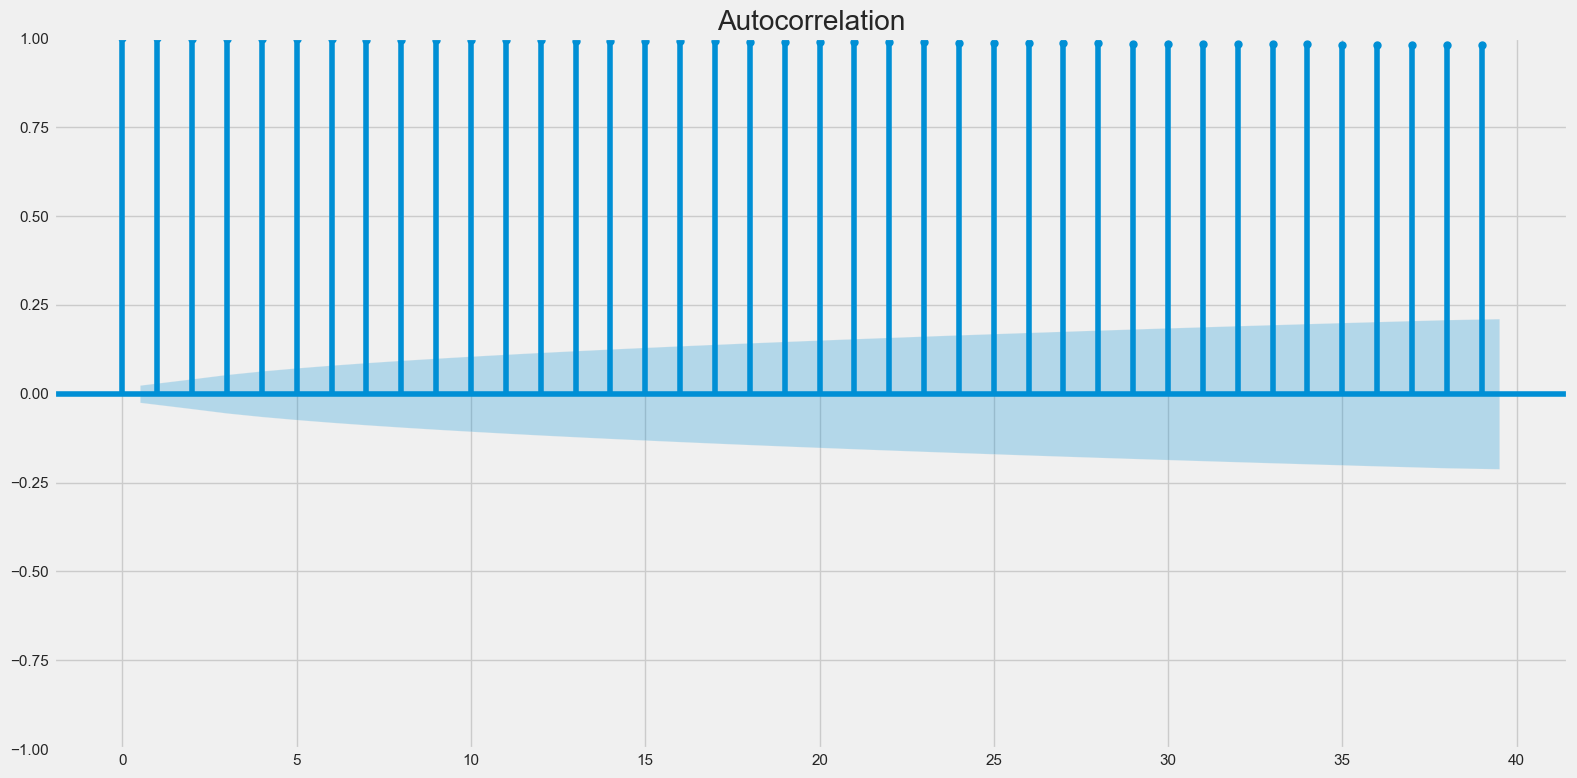

In [156]:
from statsmodels.graphics.tsaplots import plot_acf

# Cria o gráfico de autocorrelação para 'à_vista_real'
plot_acf(df_date_index['à_vista_real'])
plt.show()

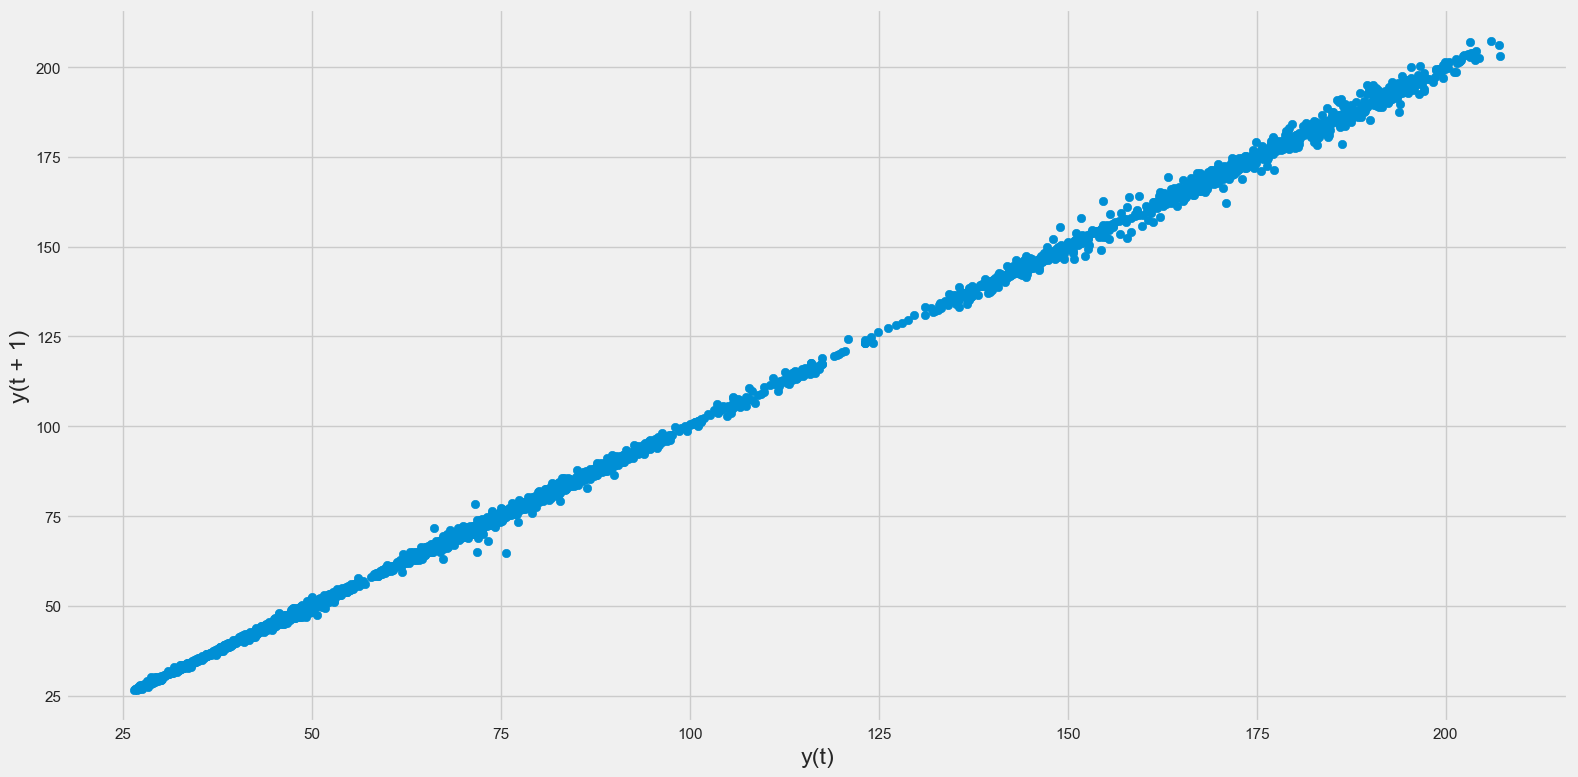

In [157]:
img_df_autocorr_1 = lag_plot(df_date_index['à_vista_real'], lag=1)
#save_image(img=img_df_autocorr_1, name='img_df_autocorr_1')

In [159]:
df_date_index['à_vista_real'].autocorr(lag=90)

0.9757281908691955

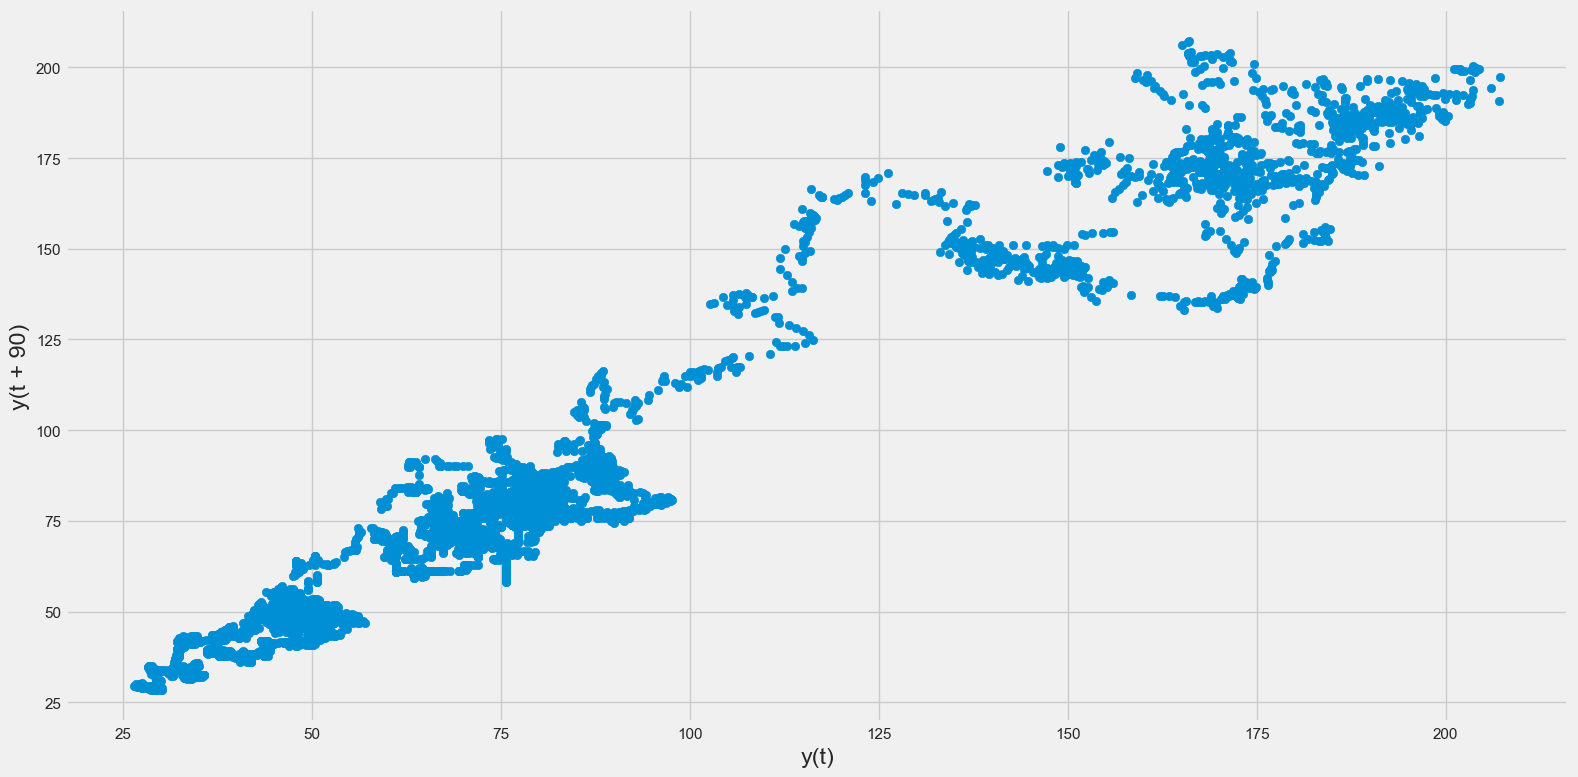

In [158]:
img_df_autocorr = lag_plot(df_date_index['à_vista_real'], lag=90)
#save_image(img=img_df_vale3_autocorr, name='img_df_vale3_autocorr')

<br/>

### **Stationarity**
É preciso garantir que os dados são estacionários. Significa que a série temporal possui um comportamento ao longo do tempo e que possui uma alta probabilidade de seguir este mesmo comportamento no futuro.

Visualmente a série não é estacionária. Para garantir o comportamento dessa série vou plotar as estatíticas de rolagem( ma, var) e fazer o teste de Dickey-Fuller.


Então neste teste avalio duas hipóteses:
- Hipótese nula (H0) : não é estacionária. Tem alguma estrutura dependente do tempo.
- Hipótese alternativa (H1) : é estacionária. Não tem estrutura dependente do tempo.

In [162]:
def test_stationarity(timeseries):

    # determing rolling statistics
    rolmean = timeseries.rolling(window=90, center=False).mean()
    rolstd  = timeseries.rolling(window=90, center=False).std()

    # plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)


    # perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag=None)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

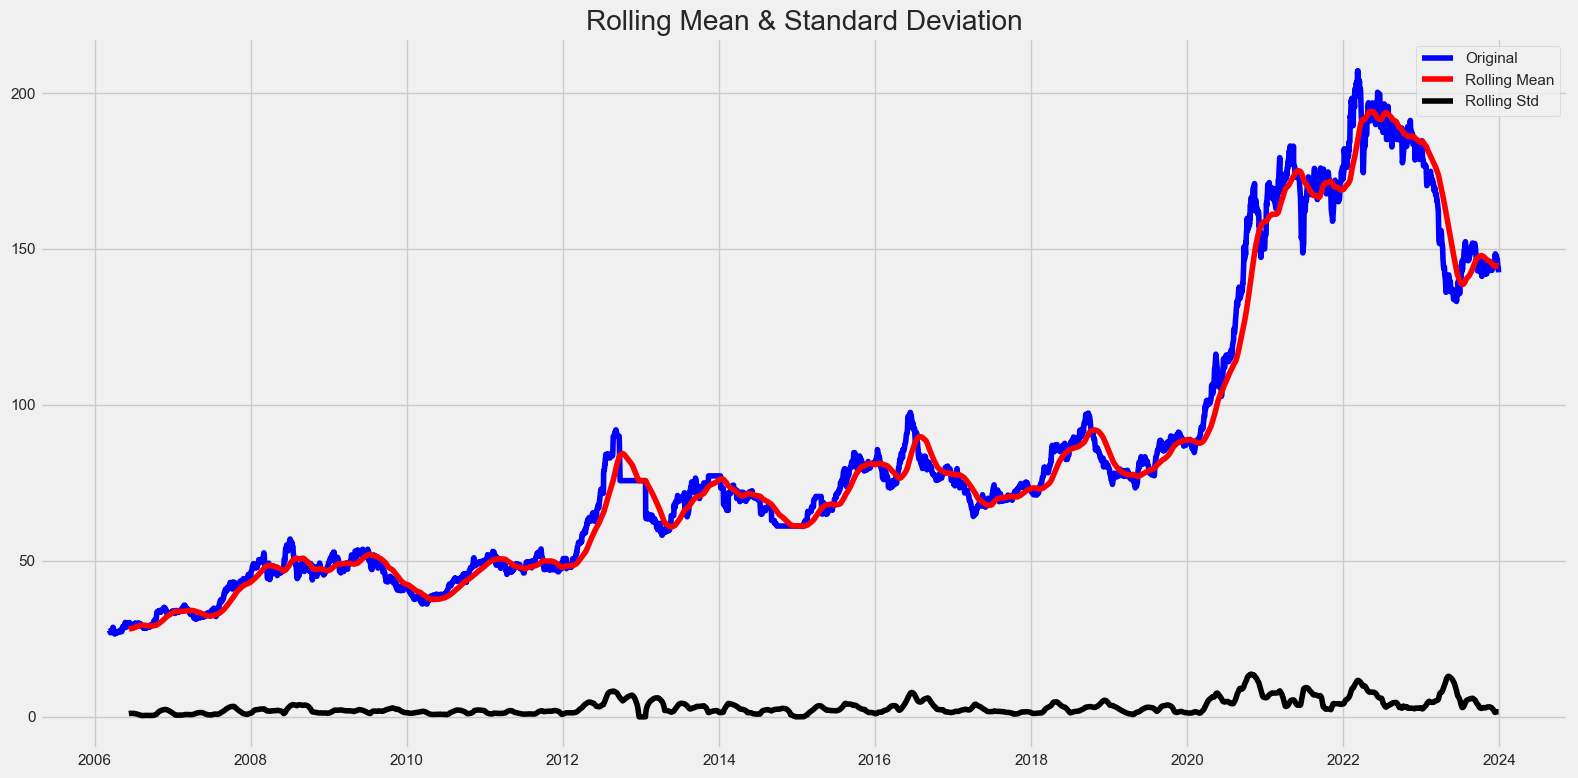

Results of Dickey-Fuller Test:
Test Statistic                  -0.90
p-value                          0.79
Lags Used                       35.00
Number of Observations Used   6464.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


In [163]:
test_stationarity(df['à_vista_real'])

<br/>

**NOTES**
<br/>
- Usado `autolag='AIC'` para a própia função determinar o lag, escolhendo o menor valor observado.
- **Test Statistic > Critical Value (1%)**, então a H0 é aceita, ou seja, não se tem estacionariedade na ST explorada.
- O `p-value` > que 0.05 também indica o mesmo.
- Neste caso se faz necessário deixar a ST estacionária !

#### Estacionariedade por Decomposição

Ambas as abordagens têm o objetivo de tornar a série temporal estacionária, mas elas fazem isso de maneiras diferentes:

A primeira abordagem que sugeri envolve a diferenciação da série temporal. Isso é útil quando a série temporal tem uma tendência ou sazonalidade que pode ser removida pela diferenciação.

A segunda abordagem que você encontrou envolve o uso do resíduo da decomposição da série temporal. Isso é útil quando a série temporal pode ser decomposta em componentes de tendência, sazonalidade e resíduo, e o resíduo é estacionário.

A escolha entre essas abordagens depende da natureza da sua série temporal. Se a série temporal tem uma tendência ou sazonalidade clara que pode ser removida pela diferenciação, a primeira abordagem pode ser mais adequada. Se a série temporal pode ser decomposta de forma significativa em componentes de tendência, sazonalidade e resíduo, a segunda abordagem pode ser mais adequada.

Em última análise, a melhor abordagem pode depender de experimentação e análise dos resultados. Você pode tentar ambas as abordagens e ver qual delas resulta em uma série temporal que é mais estacionária e melhor se ajusta ao seu modelo.

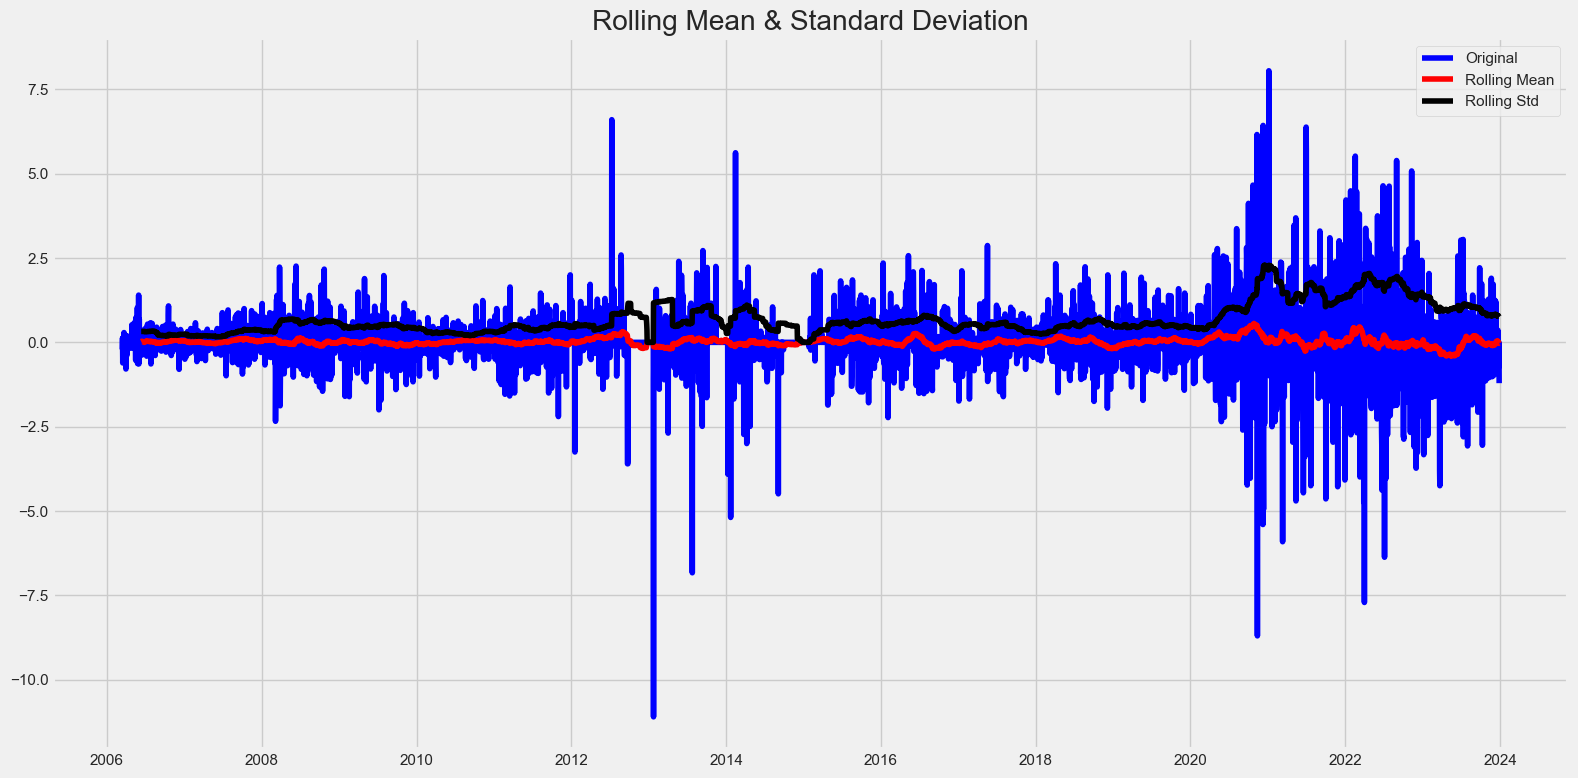

Results of Dickey-Fuller Test:
Test Statistic                 -12.99
p-value                          0.00
Lags Used                       35.00
Number of Observations Used   6463.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


In [164]:
# 01.
df_diff = df['à_vista_real'].diff().dropna()
test_stationarity(df_diff)

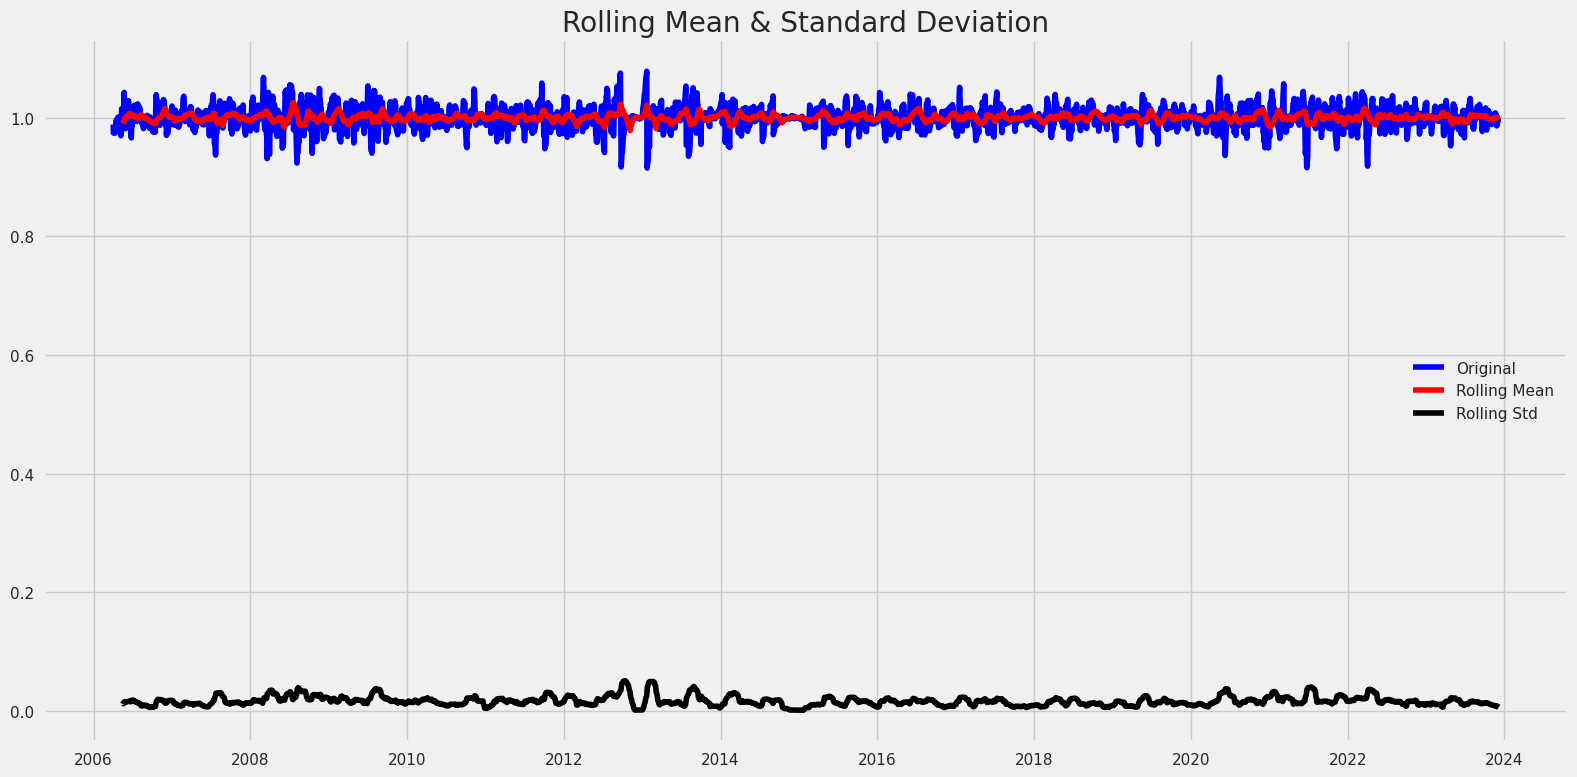

Results of Dickey-Fuller Test:
Test Statistic                 -15.97
p-value                          0.00
Lags Used                       31.00
Number of Observations Used   4375.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


In [ ]:
# 02.
residual
residual.dropna(inplace=True)
test_stationarity(residual)

---

## **Preparação de dados: engenharia de recursos**

In [177]:
cols = ['data', 'preco', 'residuos', 'tendencia', 'sazonalidade']

In [178]:
df2 = pd.DataFrame(columns=cols)
df2.head()

,data,preco,residuos,tendencia,sazonalidade


In [179]:
df2['data'] = df['data']
df2.head()

,data,preco,residuos,tendencia,sazonalidade
data,,,,,
2006-03-13,2006-03-13,NaN,NaN,NaN,NaN
2006-03-14,2006-03-14,NaN,NaN,NaN,NaN
2006-03-15,2006-03-15,NaN,NaN,NaN,NaN
2006-03-16,2006-03-16,NaN,NaN,NaN,NaN
2006-03-17,2006-03-17,NaN,NaN,NaN,NaN


In [180]:
df2['preco'] = df['à_vista_real']
df2.head()

,data,preco,residuos,tendencia,sazonalidade
data,,,,,
2006-03-13,2006-03-13,27.66,NaN,NaN,NaN
2006-03-14,2006-03-14,27.45,NaN,NaN,NaN
2006-03-15,2006-03-15,27.58,NaN,NaN,NaN
2006-03-16,2006-03-16,26.97,NaN,NaN,NaN
2006-03-17,2006-03-17,26.96,NaN,NaN,NaN


In [181]:
df2['tendencia'] = trend.values
df2.head(20)

,data,preco,residuos,tendencia,sazonalidade
data,,,,,
2006-03-13,2006-03-13,27.66,NaN,NaN,NaN
2006-03-14,2006-03-14,27.45,NaN,NaN,NaN
2006-03-15,2006-03-15,27.58,NaN,NaN,NaN
2006-03-16,2006-03-16,26.97,NaN,NaN,NaN
2006-03-17,2006-03-17,26.96,NaN,NaN,NaN
2006-03-18,2006-03-18,27.09,NaN,NaN,NaN
2006-03-19,2006-03-19,27.23,NaN,NaN,NaN
2006-03-20,2006-03-20,27.36,NaN,NaN,NaN
2006-03-21,2006-03-21,27.55,NaN,NaN,NaN


In [182]:
df2['sazonalidade'] = seasonal.values
df2.head(20)

,data,preco,residuos,tendencia,sazonalidade
data,,,,,
2006-03-13,2006-03-13,27.66,NaN,NaN,-0.20
2006-03-14,2006-03-14,27.45,NaN,NaN,-0.33
2006-03-15,2006-03-15,27.58,NaN,NaN,-0.49
2006-03-16,2006-03-16,26.97,NaN,NaN,-0.48
2006-03-17,2006-03-17,26.96,NaN,NaN,-0.53
2006-03-18,2006-03-18,27.09,NaN,NaN,-0.64
2006-03-19,2006-03-19,27.23,NaN,NaN,-0.72
2006-03-20,2006-03-20,27.36,NaN,NaN,-0.81
2006-03-21,2006-03-21,27.55,NaN,NaN,-0.77


In [183]:
residuos = residual.values

In [175]:
df2 = df2[90:]

In [184]:
df2['residuos'] = residuos
df2.head()

,data,preco,residuos,tendencia,sazonalidade
data,,,,,
2006-03-13,2006-03-13,27.66,NaN,NaN,-0.20
2006-03-14,2006-03-14,27.45,NaN,NaN,-0.33
2006-03-15,2006-03-15,27.58,NaN,NaN,-0.49
2006-03-16,2006-03-16,26.97,NaN,NaN,-0.48
2006-03-17,2006-03-17,26.96,NaN,NaN,-0.53


In [186]:
df2

,data,preco,residuos,tendencia,sazonalidade
data,,,,,
2006-03-13,2006-03-13,27.66,NaN,NaN,-0.20
2006-03-14,2006-03-14,27.45,NaN,NaN,-0.33
2006-03-15,2006-03-15,27.58,NaN,NaN,-0.49
2006-03-16,2006-03-16,26.97,NaN,NaN,-0.48
2006-03-17,2006-03-17,26.96,NaN,NaN,-0.53
...,...,...,...,...,...
2023-12-24,2023-12-24,145.17,NaN,NaN,-0.40
2023-12-25,2023-12-25,144.44,NaN,NaN,-0.29
2023-12-26,2023-12-26,143.71,NaN,NaN,-0.30


#### Gerar diferença

In [187]:
df2['diff_1'] = df2['preco'].diff(periods=1)
df2['diff_2'] = df2['preco'].diff(periods=2)
df2['diff_3'] = df2['preco'].diff(periods=3)
df2['diff_4'] = df2['preco'].diff(periods=4)
df2['diff_5'] = df2['preco'].diff(periods=5)

df2.dropna(inplace=True)

In [188]:
df2.head(10)

,data,preco,residuos,tendencia,sazonalidade,diff_1,diff_2,diff_3,diff_4,diff_5
data,,,,,,,,,,
2006-04-27,2006-04-27,27.15,-1.38,28.06,0.47,-0.17,-0.29,-0.18,-0.11,-0.03
2006-04-28,2006-04-28,27.67,-0.77,28.08,0.35,0.52,0.35,0.23,0.34,0.41
2006-04-29,2006-04-29,27.65,-0.81,28.11,0.35,-0.02,0.50,0.33,0.21,0.32
2006-04-30,2006-04-30,27.63,-0.75,28.14,0.23,-0.02,-0.04,0.48,0.31,0.19
2006-05-01,2006-05-01,27.61,-0.88,28.18,0.31,-0.02,-0.04,-0.06,0.46,0.29
2006-05-02,2006-05-02,27.59,-0.81,28.21,0.19,-0.02,-0.04,-0.06,-0.08,0.44
2006-05-03,2006-05-03,27.58,-0.75,28.24,0.10,-0.01,-0.03,-0.05,-0.07,-0.09
2006-05-04,2006-05-04,27.82,-0.62,28.26,0.18,0.24,0.23,0.21,0.19,0.17
2006-05-05,2006-05-05,27.76,-0.75,28.28,0.23,-0.06,0.18,0.17,0.15,0.13


---

## **Save Clean Data**

In [189]:
df2.to_csv(r'C:\Users\Lucas S\OneDrive\Documents\ADM_UFPB\TCC1\db_soja_modificado\db_pré-processado_02.csv', sep=',', index=False, encoding='utf8')

---